### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

### Importing keras

In [2]:
import keras

C:\Users\kingsumedh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Importing keras models

In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint

### Using tensorflow-gpu

In [4]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17900095054793346010
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6693025874
locality {
  bus_id: 1
  links {
  }
}
incarnation: 10359812611387600177
physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


### Loading Image dataset

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
training_set = train_datagen.flow_from_directory('D:/Fall 18/Neural Networks/Project/Dataset for Tensorflow/Train',
                                                 target_size=(64, 64),
                                                 batch_size= 32,
                                                 class_mode='categorical')

Found 2336 images belonging to 10 classes.


In [9]:
test_set = test_datagen.flow_from_directory('D:/Fall 18/Neural Networks/Project/Dataset for Tensorflow/Test',
                                                        target_size = (64, 64),
                                                        batch_size = 32,
                                                        class_mode = 'categorical')

Found 549 images belonging to 10 classes.


### Building the model

In [10]:
classifier = Sequential()

In [11]:
#Creating the method for model
#Step 1- Convolution
classifier.add(Convolution2D(128, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(Convolution2D(64, (3, 3), activation = 'relu'))

#adding another layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))

#Pooling it
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding another layer
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))


#Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#Adding another layer
#classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))


#Pooling
#classifier.add(MaxPooling2D(pool_size = (2, 2)))



In [12]:
#Step 3- Flattening
classifier.add(Flatten())

#Step 4- Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

#For the output step
classifier.add(Dense(units = 10, activation = 'softmax'))
classifier.add(Dropout(0.01))

In [13]:
classifier.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
checkpointer_relu = keras.callbacks.ModelCheckpoint(filepath = 'D:/Fall 18/Neural Networks/Project/Dataset for Tensorflow/checkp_relu.hdf5', monitor='val_acc', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

plot_compare = classifier.fit_generator(training_set,
                    steps_per_epoch=(2336/32),
                    epochs = 32,
                    validation_data=test_set,
                    validation_steps=(549/32), callbacks = [checkpointer_relu])

Epoch 1/32
73/73 [==============================] - 19s 263ms/step - loss: 1.4572 - acc: 0.5809 - val_loss: 0.7477 - val_acc: 0.7760
Epoch 2/32
73/73 [==============================] - 7s 99ms/step - loss: 0.7979 - acc: 0.7975 - val_loss: 0.5114 - val_acc: 0.8689
Epoch 3/32
73/73 [==============================] - 8s 108ms/step - loss: 0.5090 - acc: 0.8634 - val_loss: 0.4091 - val_acc: 0.8689
Epoch 4/32
73/73 [==============================] - 7s 93ms/step - loss: 0.5325 - acc: 0.8810 - val_loss: 0.3908 - val_acc: 0.8871
Epoch 5/32
73/73 [==============================] - 8s 108ms/step - loss: 0.4351 - acc: 0.8985 - val_loss: 0.3508 - val_acc: 0.8871
Epoch 6/32
73/73 [==============================] - 7s 99ms/step - loss: 0.3647 - acc: 0.9157 - val_loss: 0.3383 - val_acc: 0.8998
Epoch 7/32
73/73 [==============================] - 8s 110ms/step - loss: 0.3753 - acc: 0.9191 - val_loss: 0.3151 - val_acc: 0.8907
Epoch 8/32
73/73 [==============================] - 7s 101ms/step - loss: 0.34

### Inputing new image for prediction

In [23]:
from keras.preprocessing import image as image_utils
test_image = image_utils.load_img('D:/Fall 18/Neural Networks/Project/Dataset for Tensorflow/braint.jpg', target_size=(64, 64))
test_image = image_utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

In [24]:
test_set.class_indices

{'Faces': 0,
 'Motorbikes': 1,
 'airplanes': 2,
 'bonsai': 3,
 'brain': 4,
 'buddha': 5,
 'butterfly': 6,
 'car_side': 7,
 'helicopter': 8,
 'watch': 9}

In [25]:
result = classifier.predict_on_batch(test_image)
result

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Getting the prediction for input image

In [26]:
print(result.argmax())
for category, value in test_set.class_indices.items():
            if value == result.argmax():
                print(category)

4
brain


### Plotting graph for training accuracy and validation accuracy

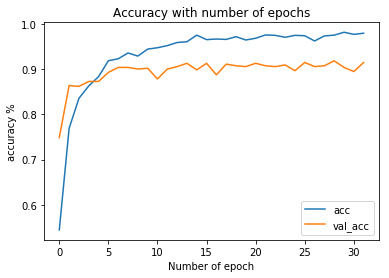

In [23]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(plot_compare.history['acc'])
pllt.plot(plot_compare.history['val_acc'])
pllt.title('Accuracy with number of epochs')
pllt.ylabel('accuracy %')
pllt.xlabel('Number of epoch')
pllt.legend(['acc', 'val_acc'])
pllt.show()

### Plotting graph for loss between training and test set

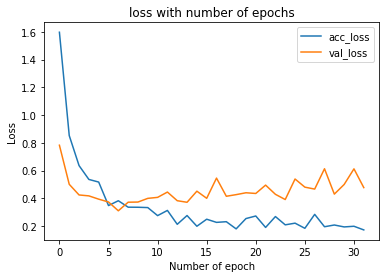

In [24]:
import matplotlib.pyplot as pllt
%matplotlib inline
pllt.plot(plot_compare.history['loss'])
pllt.plot(plot_compare.history['val_loss'])
pllt.title('loss with number of epochs')
pllt.ylabel('Loss')
pllt.xlabel('Number of epoch')
pllt.legend(['acc_loss', 'val_loss'])
pllt.show()

In [25]:
plot_compare.history['val_acc']

[0.7486338798899902,
 0.8633879781420765,
 0.8615664846258737,
 0.8724954463745076,
 0.872495446483077,
 0.8925318763555725,
 0.9034608378870674,
 0.9034608378870674,
 0.8998178506375227,
 0.9016393442622951,
 0.8779599272488244,
 0.8998178506375227,
 0.9052823315118397,
 0.912568306010929,
 0.8979963570127505,
 0.9125683061194985,
 0.8870673952641166,
 0.9107468123861566,
 0.907103825136612,
 0.9052823316204092,
 0.9125683061194985,
 0.907103825353751,
 0.9052823316204092,
 0.9089253188699539,
 0.8961748634965476,
 0.9143897996357013,
 0.9052823315118397,
 0.907103825136612,
 0.9180327868852459,
 0.9034608379956369,
 0.8943533698717753,
 0.9143897997442707]

In [26]:
plot_compare.history['acc']

[0.5445205479452054,
 0.7688356164383562,
 0.8351883561643836,
 0.8625856164383562,
 0.8831335616438356,
 0.918236301369863,
 0.9225171232876712,
 0.9353595890410958,
 0.9285102739726028,
 0.9439212328767124,
 0.946917808219178,
 0.9516267123287672,
 0.9584760273972602,
 0.9601883561643836,
 0.9747431506849316,
 0.9648972602739726,
 0.966181506849315,
 0.9653253424657534,
 0.971318493150685,
 0.964041095890411,
 0.9678938356164384,
 0.9751712328767124,
 0.9743150684931506,
 0.9700342465753424,
 0.9743150684931506,
 0.973458904109589,
 0.9619006849315068,
 0.9730308219178082,
 0.9747431506849316,
 0.9811643835616438,
 0.9764554794520548,
 0.9790239726027398]